# Etapa 1 - Análise exploratória dos dados

## Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

## Datasets

In [ ]:
import pandas as pd

# carregando datasets (vinho tinto e branco)
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

print("Red wine shape:", df_red.shape)
print("White wine shape:", df_white.shape)

# adicionando coluna indicando o tipo
df_red['type'] = 'red'
df_white['type'] = 'white'

# concatenando os datasets
df = pd.concat([df_red, df_white], ignore_index=True)

print(df.shape)

# convertendo 'white' e 'red' para numérico binário
df['type'] = df['type'].map({'red': 0, 'white': 1})

df.head()

Red wine shape: (1599, 12)
White wine shape: (4898, 12)
(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Distribuição de Classes

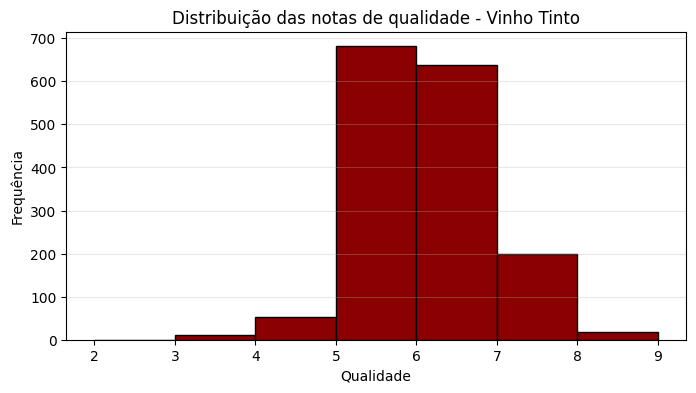

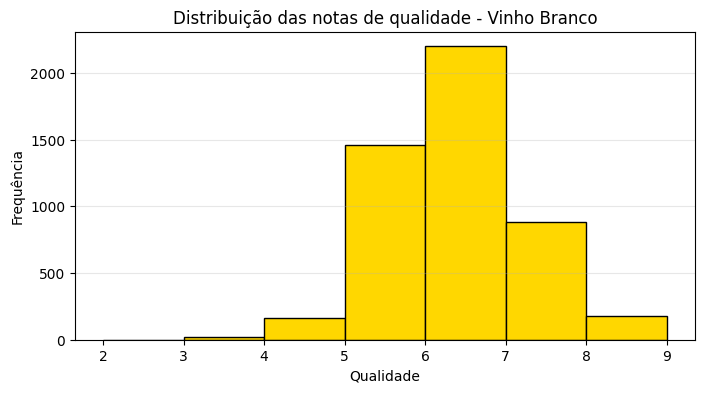

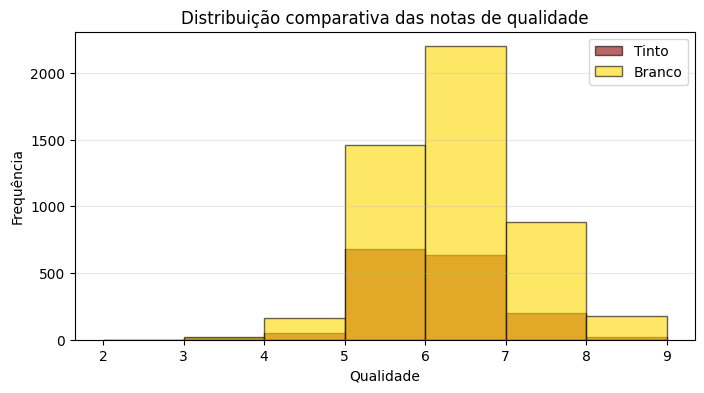

In [ ]:
# distribuição dos vinhos tintos
plt.figure(figsize=(8,4))
plt.hist(df_red["quality"], bins=range(2,10), edgecolor="black", color="darkred")
plt.title("Distribuição das notas de qualidade - Vinho Tinto")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.grid(axis="y", alpha=0.3)
plt.show()

# distribuição dos vinhos brancos
plt.figure(figsize=(8,4))
plt.hist(df_white["quality"], bins=range(2,10), edgecolor="black", color="gold")
plt.title("Distribuição das notas de qualidade - Vinho Branco")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.grid(axis="y", alpha=0.3)
plt.show()

# comparação entre os dois tipos
plt.figure(figsize=(8,4))
plt.hist(df_red["quality"], bins=range(2,10), alpha=0.6, label="Tinto", color="darkred", edgecolor="black")
plt.hist(df_white["quality"], bins=range(2,10), alpha=0.6, label="Branco", color="gold", edgecolor="black")
plt.title("Distribuição comparativa das notas de qualidade")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

## Correlação (heatmap)

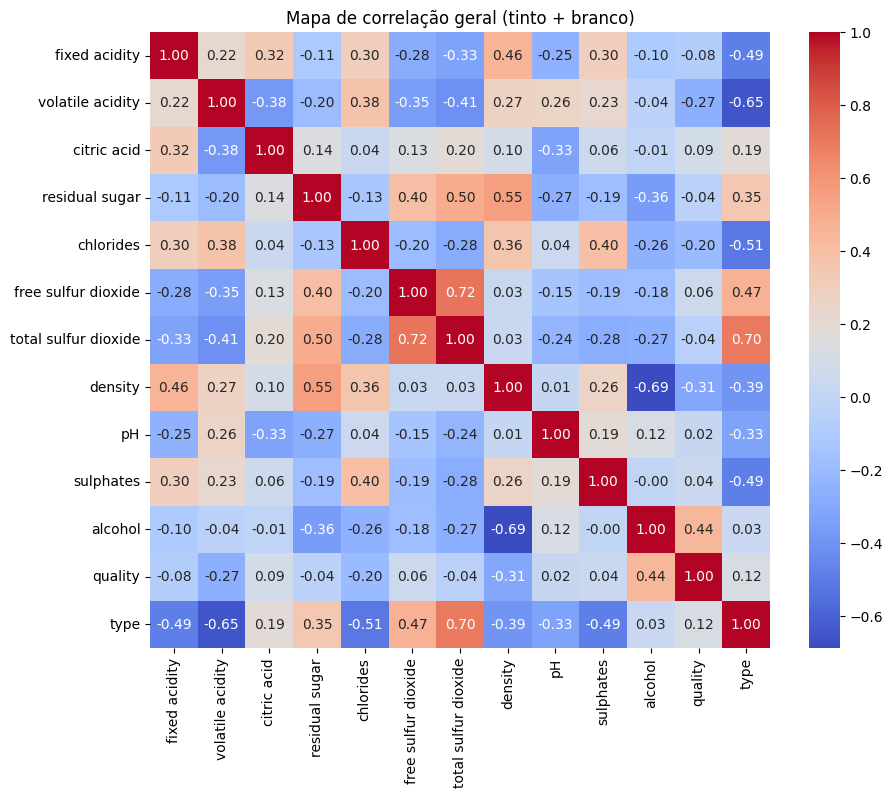


Correlação com a variável alvo (quality):
quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [ ]:
# correlação geral
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mapa de correlação geral (tinto + branco)')
plt.show()


# correlação ordenada com o atributo alvo 'quality'
print("\nCorrelação com a variável alvo (quality):")
print(corr["quality"].sort_values(ascending=False))

## Gráficos boxplot

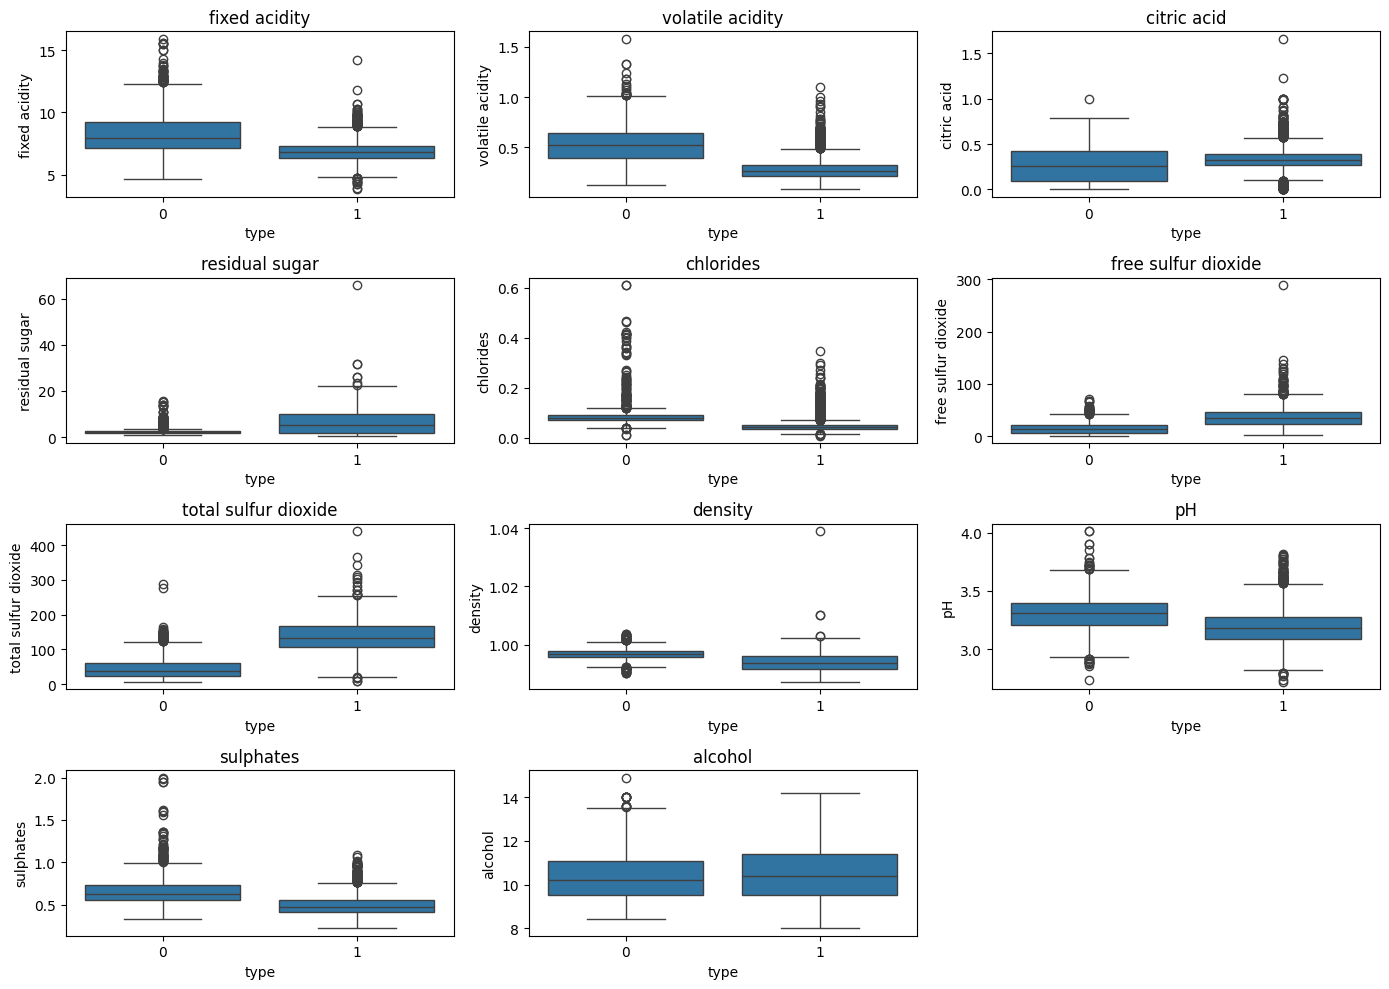

In [ ]:
# lista de atributos (excluindo a target e a coluna 'type')
features = [col for col in df.columns if col not in ['quality', 'type']]

# gera um boxplot para cada atributo (x)
plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='type', y=col, data=df)
    plt.title(col)
    plt.tight_layout()
plt.show()

## Variância (diferença de escala esperada, dados ainda não normalizados)

Variância de cada atributo:
total sulfur dioxide    3194.720039
free sulfur dioxide      315.041192
residual sugar            22.636696
fixed acidity              1.680740
alcohol                    1.422561
volatile acidity           0.027105
pH                         0.025853
sulphates                  0.022143
citric acid                0.021117
chlorides                  0.001227
density                    0.000009
dtype: float64


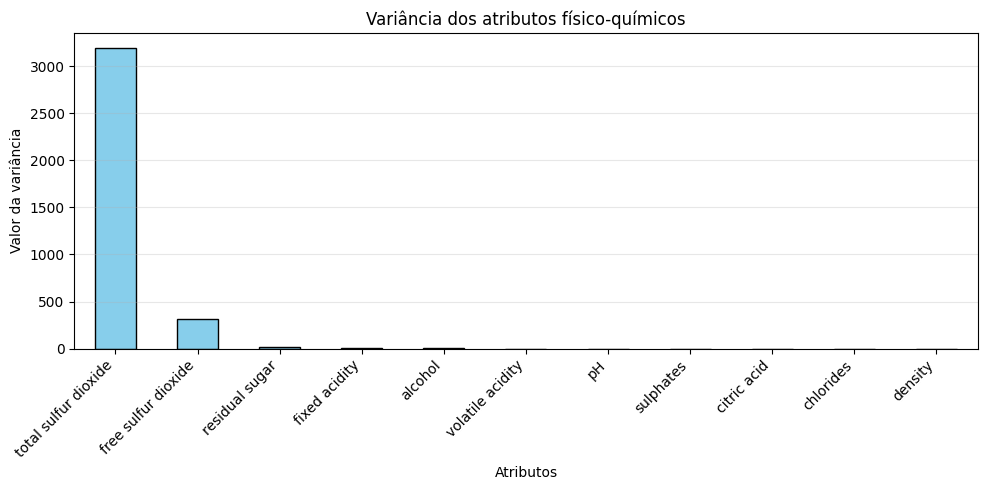

In [ ]:
# Calcula variância de cada atributo numérico (exceto 'quality' e 'type')
variances = df.drop(columns=['quality', 'type']).var().sort_values(ascending=False)

# Exibe valores numéricos
print("Variância de cada atributo:")
print(variances)

# Plota gráfico de barras
plt.figure(figsize=(10,5))
variances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Variância dos atributos físico-químicos")
plt.ylabel("Valor da variância")
plt.xlabel("Atributos")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Etapa 2 - Pré-processamento

## TO DO

- **remover atributos irrelevantes**: total sulfur dioxide
- **Normalizar os dados**
- Verificar distribuição do atributo alvo
-  **Amostragem das classes:** Muito mais instâncias do vinho branco: remover do vinho branco (1650) e criar novas de tinto (1650) com SMOTE
- **remover inconsistências**: tirar outliers dos atributos: chlorides, residual sugar, citric acid,

In [ ]:
# Semente aleatório para divisões do dataset sempre iguais
seed = 32

# Excluindo atributo: total sulfur dioxide
if 'total sulfur dioxide' in df.columns:
    df = df.drop(columns=['total sulfur dioxide'])
else:
    print("Atributo 'total sulfur dioxide' não encontrado no DataFrame.")

# Confirmar as colunas restantes
print("\nColunas restantes no dataset:")
print(df.columns.tolist())



Colunas restantes no dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


## Normalização e *Outliers*

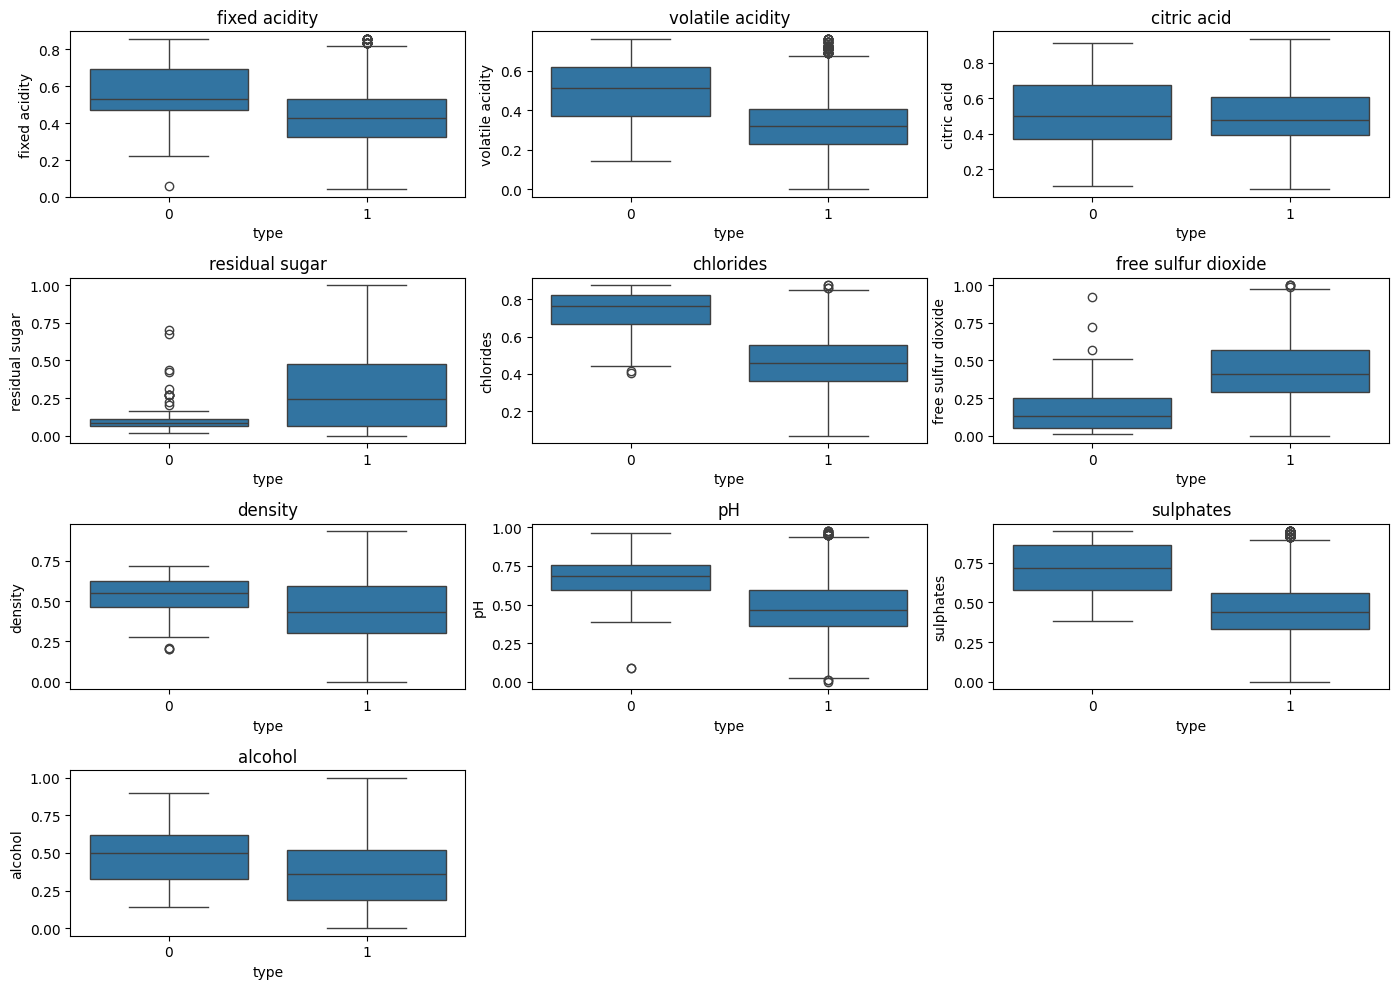

In [ ]:
cols_to_scale = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

# normalização min max
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# remoção de outliers
for col in cols_to_scale:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]



## Amostragem dos Dados

In [ ]:

X = df.drop('type', axis=1)
y = df['type']

df_red = df[df['type'] == 0]
df_white = df[df['type'] == 1]

# undersampling de vinhos brancos
df_white_down = resample(
    df_white,
    replace=False,       # sem reposição
    n_samples=3249,      # representará 50% do dataset
    random_state=seed
)

df_temp = pd.concat([df_red, df_white_down])

X_temp = df_temp.drop('type', axis=1)
y_temp = df_temp['type']

# SMOTE para aumentar vinhos tintos
smote = SMOTE(random_state=seed, sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_temp, y_temp)

df_balanced = pd.concat([X_res, y_res], axis=1)

# verificando contagem final
print(df_balanced['type'].value_counts())
df_balanced.head()
